In [1]:
#Font style
from IPython.core.display import HTML
css = open('style-table.css').read() \
+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css));

### Old versus New HST Calibrations for G230L M31 Data  
<!-- TEASER_END -->

In [2]:
import astropy.io.fits as fits
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import matplotlib.ticker as tkr

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

import astropy.io.fits as fits

%matplotlib inline

### For our M31 data, **ALL TEN** sightlines have NUV(G230L) data.

### Filenames for the OLD dataset. These are the UN-normalized set.

In [3]:
path_old = '/home/ec2-user/blog/posts/HST_Data/Old_HST/'
old_files = ['01040_NUV_times1e16.dat', '02030_NUV_times1e16.dat', '03030_NUV_times1e16.dat', \
             '04030_NUV_times1e16.dat', '05030_NUV_times1e16.dat', '06030_NUV_times1e16.dat', \
             '0703p7102_NUV_t1e16.dat', '08030_NUV_times1e16.dat', '09040_NUV_times1e16.dat', \
             '10030_NUV_times1e16.dat']

#### Filenames for the NEW dataset. These are the UN-normalized set. These have been downloaded from [here](http://archive.stsci.edu/proposal_search.php?mission=hst&id=11658): 

In [4]:
path_new = '/home/ec2-user/blog/posts/HST_Data/New_HST/'
new_files = ['lb6f01040_x1dsum.fits.gz', 'lb6f02030_x1dsum.fits.gz', 'lb6f03030_x1dsum.fits.gz', \
             'lb6f04030_x1dsum.fits.gz', 'lb6f05030_x1dsum.fits.gz', 'lb6f06030_x1dsum.fits.gz', \
             'lb6f71020_x1dsum.fits.gz', 'lb6f08030_x1dsum.fits.gz', 'lb6f09040_x1dsum.fits.gz', \
             'lb6f10030_x1dsum.fits.gz']
#lb6f71020_x1dsum.fits.gz

### Function that plots the two spectra.

In [5]:
#define plotter
minorLocatorx   = AutoMinorLocator(10)
minorLocatory   = AutoMinorLocator(4)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman') 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

def plot_spec(wave, flux, oldspec, title):#, label=None):
    #plot the OLD spectrum
    plt.plot(oldspec['lambda'], oldspec['flux'], linestyle='--', drawstyle='steps',lw=1.5, label='OLD')
    #plot the NEW spectrum
    plt.plot(wave, flux*1e16,  lw=1.5, linestyle='dashdot', drawstyle='steps', label='NEW')
    plt.xlabel('Observed Wavelength '+r'[$\AA$]', fontsize=20)
    plt.ylabel('Unnormalized Flux', fontsize=20)
    plt.xlim(2785, 2860)
    swave = oldspec.flux.where((oldspec['lambda'] >= 2790) & (oldspec['lambda'] <= 2810))
    plt.ylim(0, swave.max()*1.15)
    plt.legend(loc=4,frameon=0, prop={'size':20})
    plt.title(title, fontsize = 20)
    plt.tight_layout()
    plt.show()
    plt.clf()

### Read and plot all data.
   ### From Quasar 1 through 10, plotting the unnormalized spectra.

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


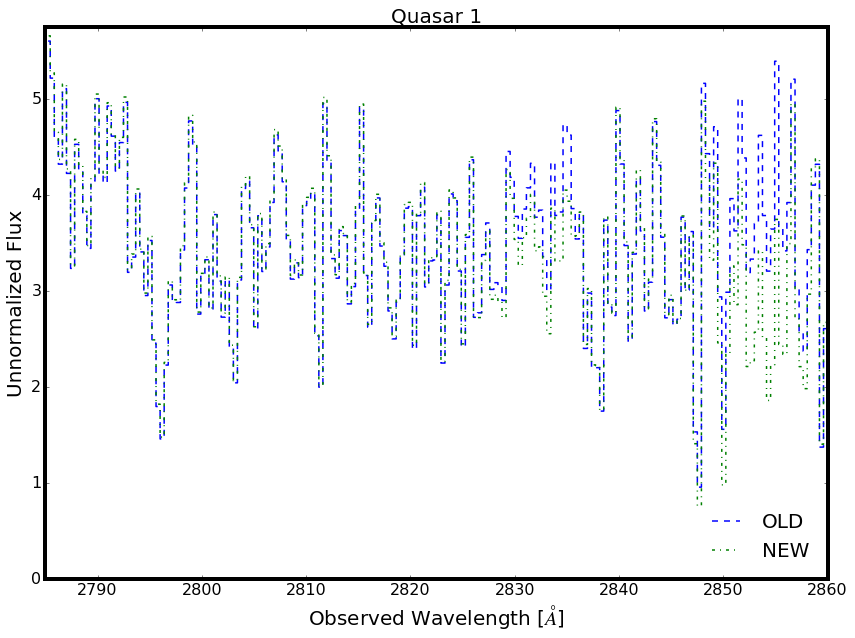

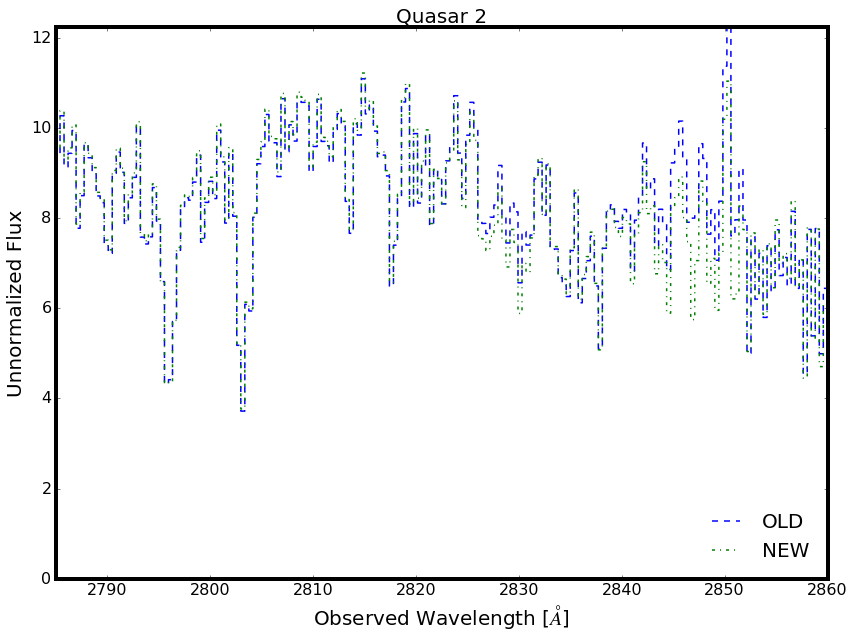

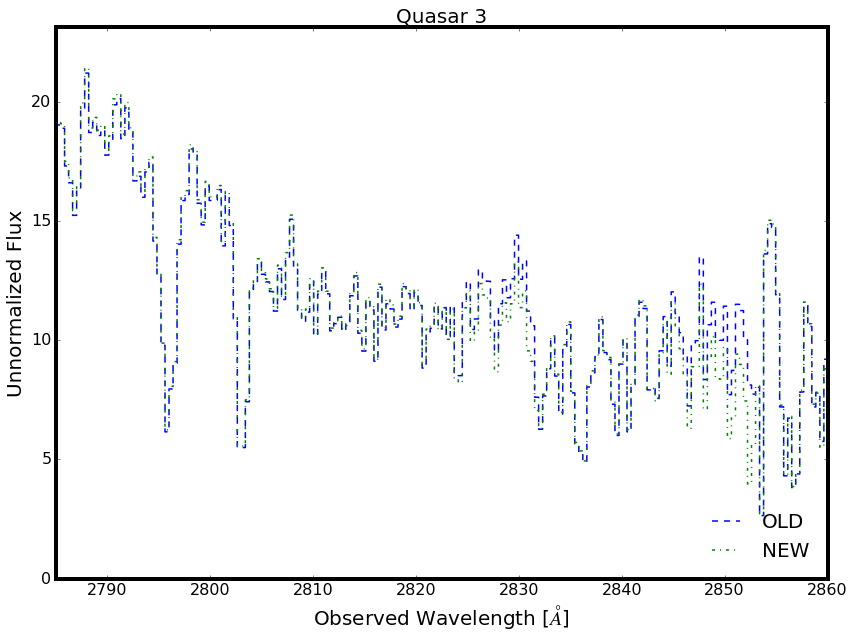

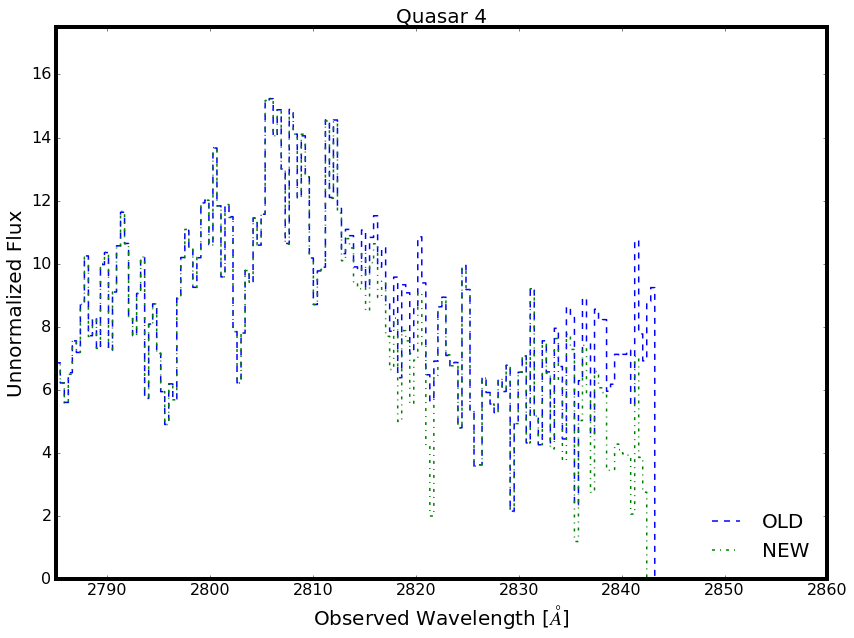

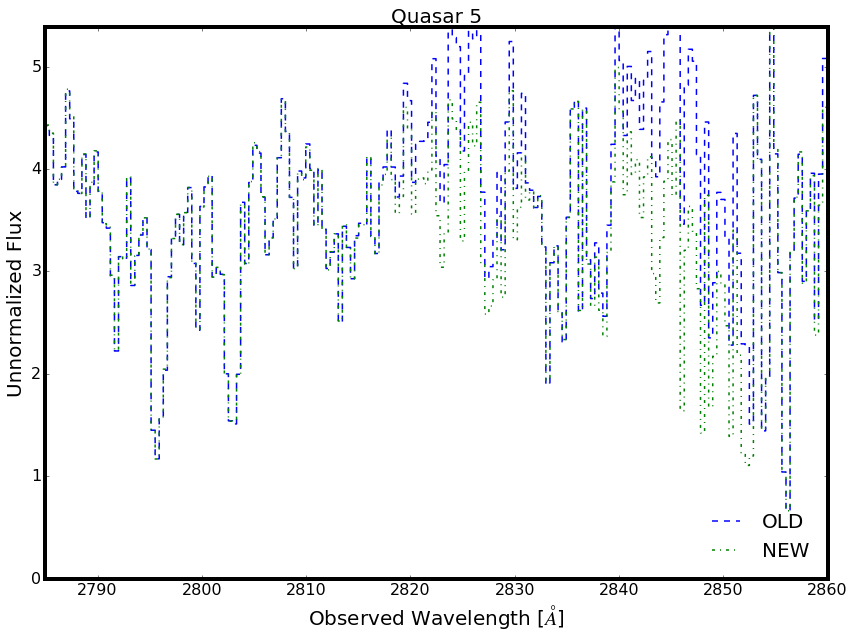

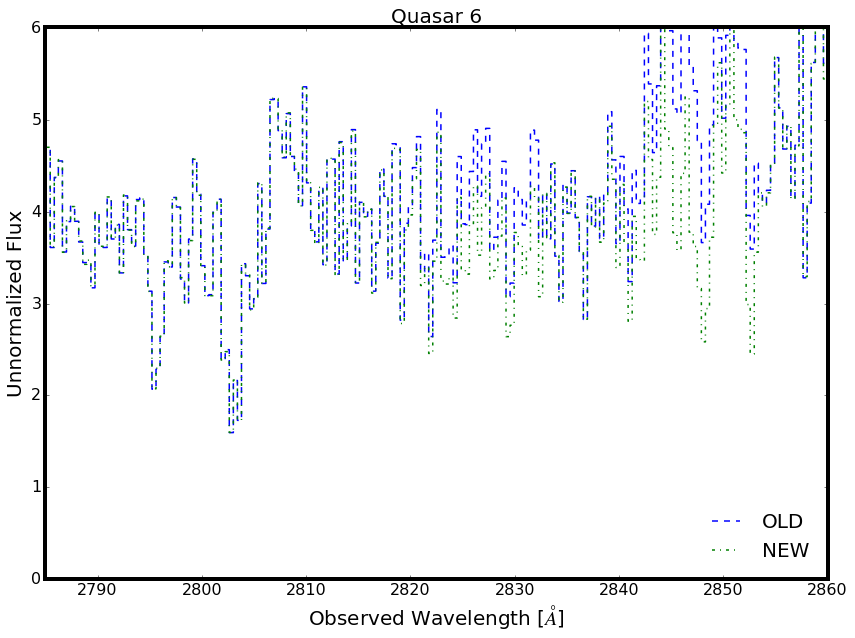

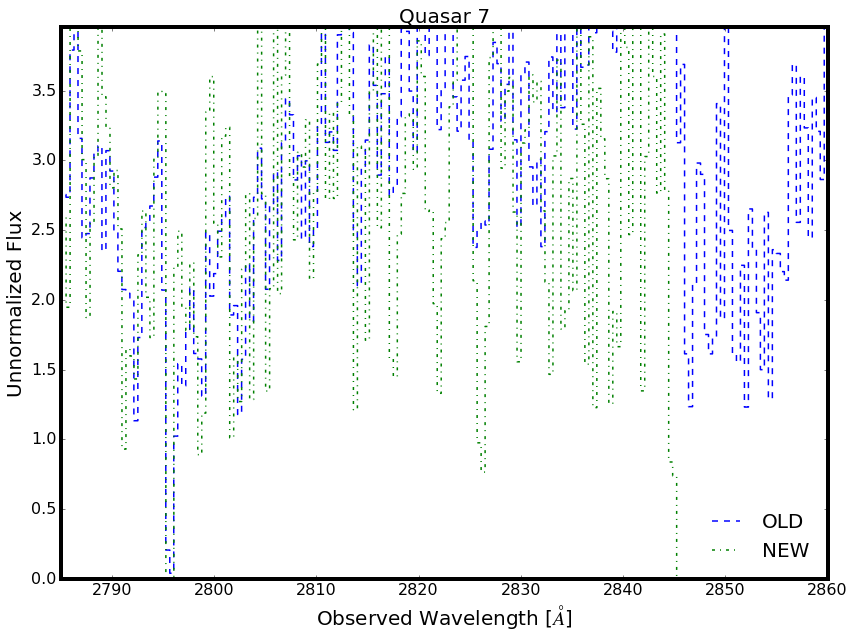

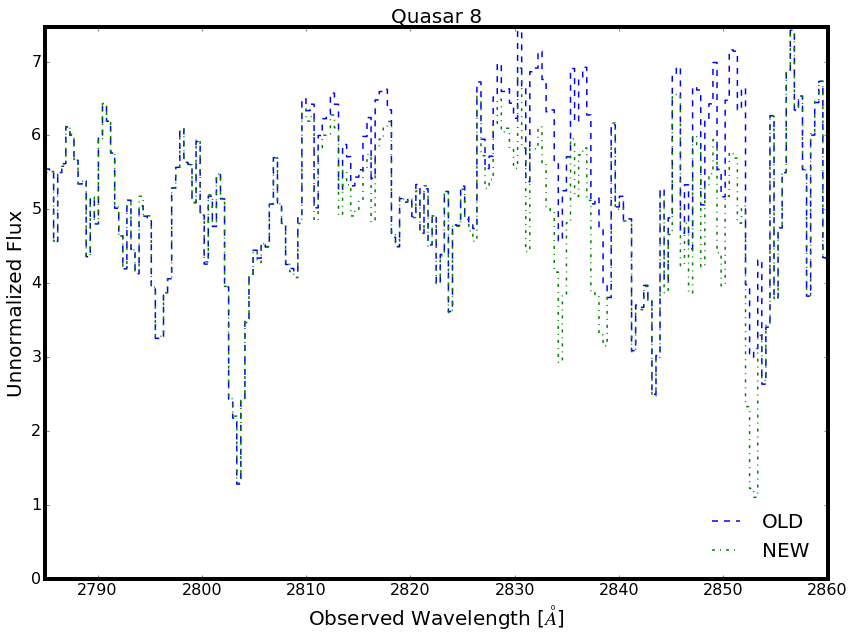

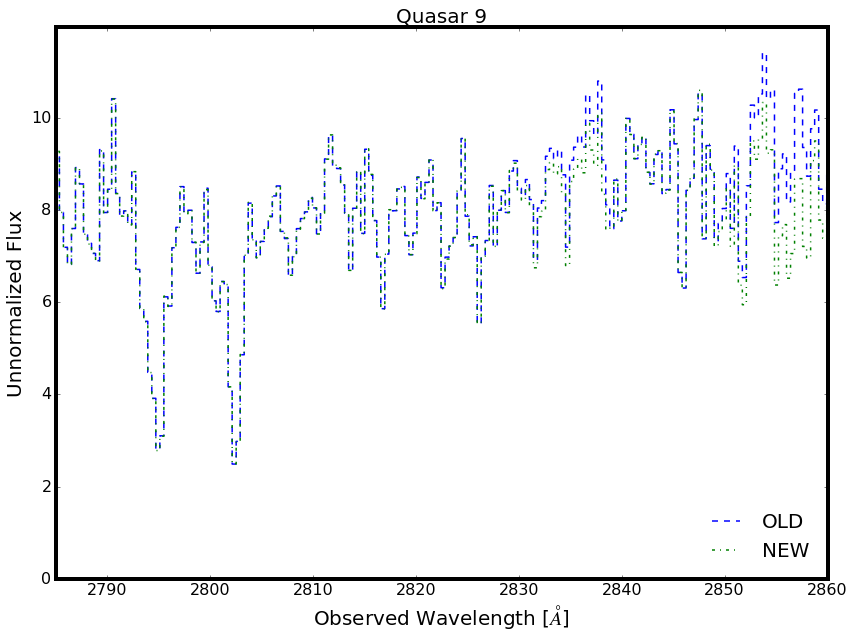

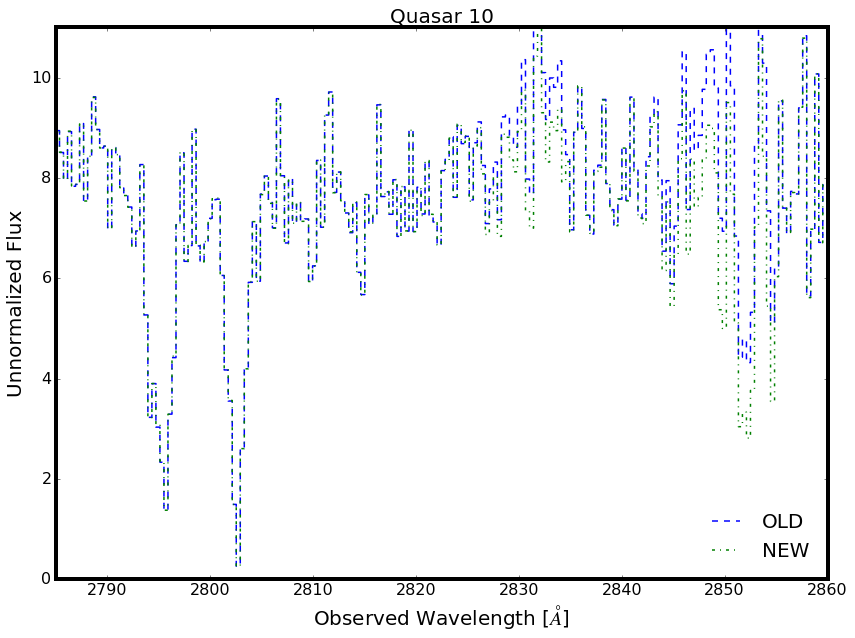

In [6]:
for i in range(10):
    oldspec = pd.read_csv(path_old+old_files[i],skiprows=1, delimiter=' ') 
    newspec, header = fits.getdata(path_new+new_files[i], 0, header=True)
    plot_spec(newspec['WAVELENGTH'][1], newspec['flux'][1], oldspec, 'Quasar '+str(i+1))

### With the exception of Quasar 7, it seems there is not much difference between the OLD and NEW G230L Calibrations.